In [1]:
# Importing Libraries
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
# Importing CSV files from system
df1 = pd.read_csv('C:/Users/Micheal Chukwuebuka/Downloads/archive (2)/heart.csv')
df2 = pd.read_csv('C:/Users/Micheal Chukwuebuka/Downloads/archive (2)/o2Saturation.csv')

# Data Visualization and Exploratory Data Analysis

In [3]:
df1.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df2.head(5)

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


In [7]:
df1.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df2.describe()

,98.6
count,3585.000000
mean,98.239275
std,0.726336
min,96.500000
25%,97.600000
50%,98.600000
75%,98.600000
max,99.600000


In [9]:
df1[df1.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df1.drop_duplicates(inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
df1.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:title={'center':'Impact of Age on Heart Attacks'}>

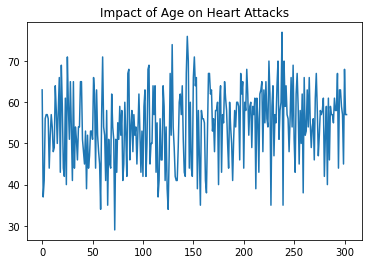

In [13]:
df1['age'].plot(kind = 'line', title = "Impact of Age on Heart Attacks")

Number of people having sex as 1 are 96 and Number of people having sex as 0 are 206


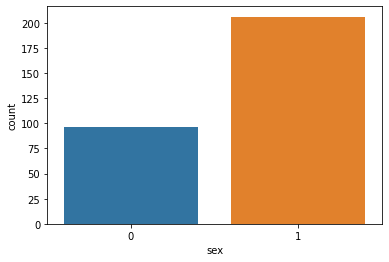

In [14]:
x=(df1.sex.value_counts())
print(f'Number of people having sex as 1 are {x[0]} and Number of people having sex as 0 are {x[1]}')
p = sns.countplot(data=df1, x="sex")
plt.show()


0    143
2     86
1     50
3     23
Name: cp, dtype: int64


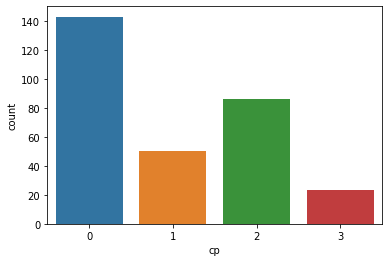

In [15]:
x=(df1.cp.value_counts())
print(x)
p = sns.countplot(data=df1, x="cp")
plt.show()

<Figure size 720x720 with 0 Axes>

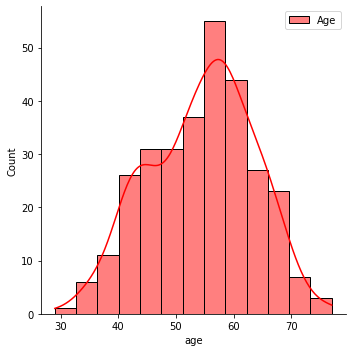

In [16]:
plt.figure(figsize=(10,10))
sns.displot(df1.age, color="red", label="Age", kde= True)
plt.legend()

C:\Users\Micheal Chukwuebuka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Micheal Chukwuebuka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


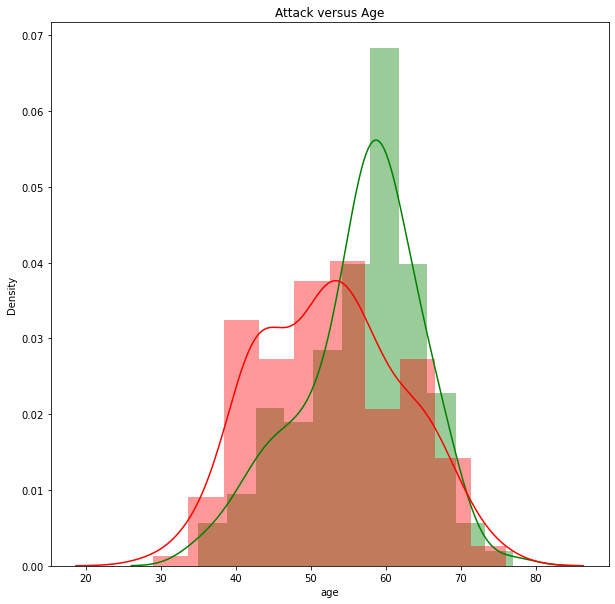

In [17]:
plt.figure(figsize=(10,10))
sns.distplot(df1[df1['output'] == 0]["age"], color='green',kde=True,) 
sns.distplot(df1[df1['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()

C:\Users\Micheal Chukwuebuka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Micheal Chukwuebuka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


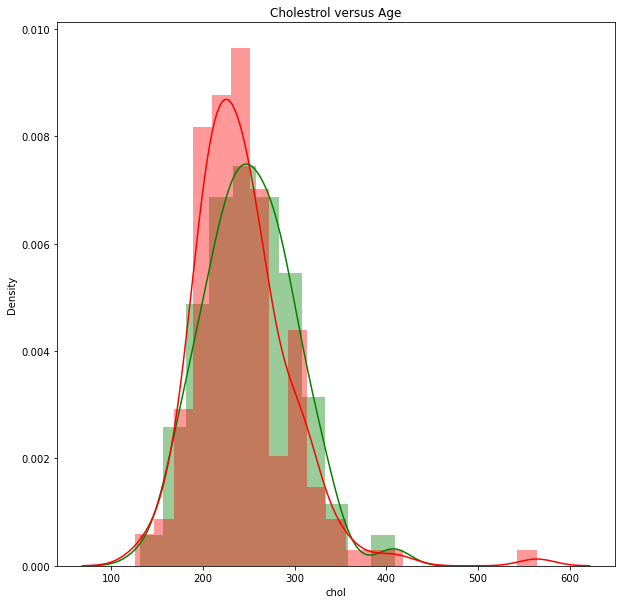

In [18]:
plt.figure(figsize=(10,10))
sns.distplot(df1[df1['output'] == 0]["chol"], color='green',kde=True,) 
sns.distplot(df1[df1['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus Age')
plt.show()

# Spilliting the datasets and building a machine learning model for the classifier. 

In [19]:
x = df1.iloc[:, 1:-1].values
y = df1.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (241, 12) (241,)
Shape for testing data (61, 12) (61,)


In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
x_train,x_test

(array([[-1.4186261 ,  0.98544689, -0.55988902, ..., -0.61492051,
         -0.70674006, -0.49876142],
        [-1.4186261 ,  0.98544689,  0.81698091, ..., -0.61492051,
          0.29516791, -0.49876142],
        [ 0.70490738,  0.98544689,  0.47276343, ...,  0.99590387,
         -0.70674006, -0.49876142],
        ...,
        [ 0.70490738,  1.94307874, -0.67462818, ..., -0.61492051,
         -0.70674006,  1.1478345 ],
        [ 0.70490738,  0.98544689,  0.35802427, ...,  0.99590387,
         -0.70674006, -0.49876142],
        [ 0.70490738,  0.98544689,  0.01380679, ...,  0.99590387,
          1.29707587,  1.1478345 ]]),
 array([[ 0.70490738,  0.02781503, -0.67462818,  0.65089023, -0.40527917,
         -0.97525383, -1.96657306, -0.6983225 ,  0.27236593, -0.61492051,
          0.29516791,  1.1478345 ],
        [ 0.70490738,  1.94307874,  2.19385084, -0.36856884, -0.40527917,
         -0.97525383,  0.23525787, -0.6983225 , -0.39657867, -0.61492051,
         -0.70674006,  1.1478345 ],
     

In [23]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[23  4]
 [ 3 31]]
The accuracy of Logistic Regression is :  88.52459016393442 %


In [24]:
# Gaussian NB
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  88.52459016393442 %


In [25]:
# Bernoulli NB
model = BernoulliNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  86.88524590163934 %


In [26]:
# SVC Model
model = SVC()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  91.80327868852459 %


In [27]:
# Random Forest
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  85.24590163934425 %


In [28]:
# KNeighbors Classifier
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")


[[23  4]
 [ 6 28]]
The accuracy of KNN is :  83.60655737704919 %


Text(0, 0.5, 'Error Rate')

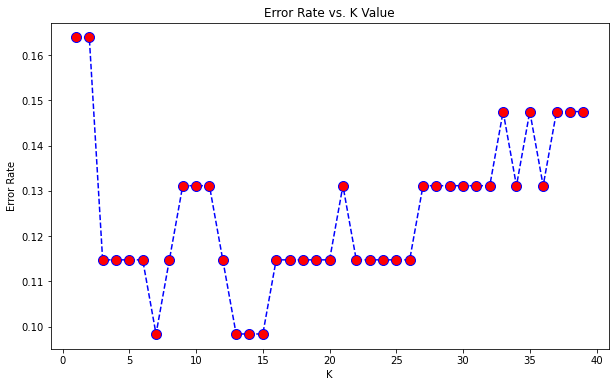

In [29]:
# Optimizing the KNN Classifier
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
# KNeighbors Classfier
model = KNeighborsClassifier(n_neighbors = 7)
  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

[[25  2]
 [ 4 30]]
The accuracy of KNN is :  90.1639344262295 %


In [31]:
# XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
   
predicted = model.predict(x_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")

[15:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

The accuracy of X Gradient Boosting is :  80.32786885245902 %
